#### 监督学习（有标准答案）----分类问题（类别）、回归分析（数量）
#### 非监督学习（无标准答案）----分群问题（类别）、降低维度（数量）

##### index_col=0不需要额外的数字索引

In [1]:
import pandas
df = pandas.read_csv('Data/salary.csv',index_col=0)
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


#### 一般Y是因变量，也就是想要分析的维度，类型为numpy.array
#### X是自变量，是df的一列，可以接受dataframe类型

In [2]:
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values

Text(0, 0.5, 'salary')

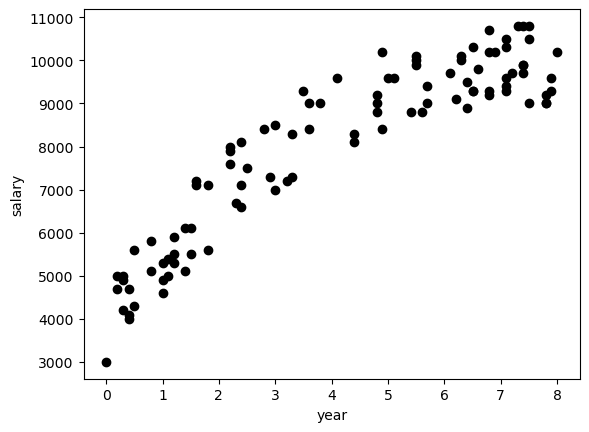

In [3]:
%matplotlib inline
plt.scatter(X,Y, color="black")
plt.xlabel('year')
plt.ylabel('salary')

#### 首先，应变量是数字，应该采用回归分析或降低维度，不同的年份可以对应确定的薪资，所以采用回归分析

#### LinearRegression()线性回归建模，regr.fit(X,Y)根据给的数据进行拟合

## 简单线性回归

In [4]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

ModuleNotFoundError: No module named 'sklearn'

#### regr.coef_得到拟合完成后的系数
#### regr.intercept_得到拟合完成后的截距

In [ ]:
print('Coefficient:{}'.format(regr.coef_) )
print('Intercept:{}'.format(regr.intercept_) )

#### regr.predict(X)输入X得到拟合完成后预测的Y

In [ ]:
plt.scatter(X,Y, color="black")
plt.plot(X, regr.predict(X), linewidth = 3, color = "blue")
plt.xlabel('year')
plt.ylabel('salary')

### 多项式线性回归

#### PolynomialFeatures(degree = 2)创建多项式（阶数为2）的模型
#### poly_reg.fit_transform(X)将X转换成符合多项式模型的矩阵
#### regr.fit(X_, Y)用多项式矩阵X_和Y一起训练

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg= PolynomialFeatures(degree = 2)
X_ = poly_reg.fit_transform(X)
regr = LinearRegression()
regr.fit(X_, Y)

#### 多归式模型对顺序比较敏感，自变量的顺序与因变量的顺序一致，拟合结果会更加准确
#### 画图得到的结果会更好，训练还是用原数据

In [ ]:
X2 = X.sort_values(['year'])
X2_ = poly_reg.fit_transform(X2)

In [ ]:
plt.scatter(X,Y, color="black")
plt.plot(X2, regr.predict(X2_), color= "blue", linewidth = 3)

In [2]:
import pandas
df = pandas.read_csv('data/house-prices.csv')

In [3]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


#### 多归式（单变量）模型，变量保持连续型数字，对于Brick和Neighborhood生成连续型数字
#### 由于生成的连续型变量相互有联系，应该删除其中一个变量

In [4]:
house = pandas.concat([df, pandas.get_dummies(df['Brick']), pandas.get_dummies(df['Neighborhood'])], axis = 1)
del house['No']
del house['West']
del house['Brick']
del house['Neighborhood']
del house['Home']
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,East,North
0,114300,1790,2,2,2,False,True,False
1,114200,2030,4,2,3,False,True,False
2,114800,1740,3,2,1,False,True,False
3,94700,1980,3,2,3,False,True,False
4,119800,2130,3,3,3,False,True,False


In [5]:
X = house[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North']]
Y = house['Price'].values

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

In [ ]:
regr.predict(X)